# Gruppen-Aufgabe 2 Visualiseren

## Welche Arten von Daten sind im Datensatz zu finden? 

Numerische und kategoriale Daten

## Welche Erkenntnisse können Sie mithilfe der Methoden deskriptiver Statistik ziehen?
a) Minimal- und Maximalwert, Mittelwert & Median, Standardabweichung der jeweiligen Variablen 
b) Korrelationen zwischen den zwischen den numerischen Variablen 
c) für eine Variable: Histogramm & Boxplots
    für zwei (oder mehr Variablen): Liniendiagramme, Scatterplots. ...

## Welche Erkenntnisse können Sie durch die verschiedenen Visualisierungsdiagramme ziehen? (angewendet auch auf die folgenden Fragestellungen)         
a) Mit Boxplots können Ausreißer schnell erkannt werden
b) mit Histogrammen die Streuung und Verteilung schnell visualisiert werden
c) mit Heatmaps Korrelationen zwischen allen Variablen erkennen und dann 
d) mit Liniendiagrammen und Scatterplots Korrelationen zwischen zwei Variablen genauer untersuchen

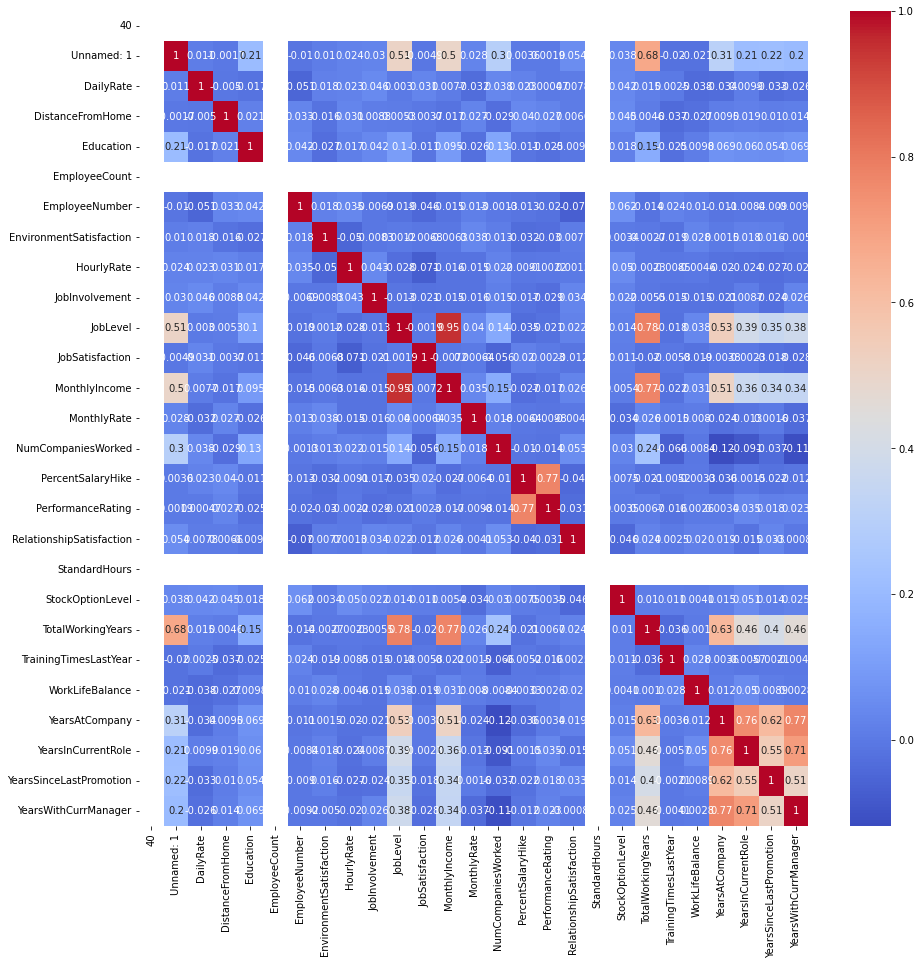

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datensatz laden und Korrelationsmatrix erstellen
df = pd.read_csv('Employee Attrition and Factors.csv')
matrix = df.corr()

# Größe der Heatmap definieren und erstellen
fig = plt.subplots(figsize=(15,15)) # chatGPT
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

## Gibt es fehlende Daten? 

In [10]:
print(df.isnull().sum())


40                          1470
Unnamed: 1                     0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTi

In [ ]:
# Es gibt keine fehlenden Daten

In [34]:
# Bereinigung der Ausreißer durch Capping

# Anzahl der Spalten
num_columns = df.shape[1]
        
for spaltenNummer in range(num_columns):
    spalte = df.iloc[:, spaltenNummer].copy() # es wird eine Kopie der jeweiligen Spalte angelegt um an dieser die Werte zu verändern
    try:  # da Perzentille nur für nummerische Werte berechenbar (sonst Fehler)
        percentile25 = spalte.quantile(0.25)
        percentile75 = spalte.quantile(0.75)
        iqr = percentile75 -percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
        # Programmablauf-Kontrolle der Grenzen
        # print(f"Spalte {spaltenNummer}: {percentile25} : {percentile75} : {upper_limit} : {lower_limit} : ")
        
        # upper_outliers = spalte[(spalte > upper_limit)] # 
        # Programmablauf-Kontrolle der Anzahl der Ober-Ausreißer vor der Bereinigung
        # print(f"Spalte {spaltenNummer}: Ober-Ausreißer vor der Bereinigung {len(upper_outliers)} von {len(spalte)} ") 
        
        # Capping der Ausreißer auf das obere bzw. untere Quartil
        spalte[(spalte > upper_limit)] = upper_limit
        spalte[(spalte < lower_limit)] = lower_limit
        
        # Programmablauf-Kontrolle der Anzahl der Ober-Ausreißer nach der Bereinigung
        # upper_outliers = spalte[(spalte > upper_limit)]# | spalte < lower_limit)]
        # print(f"Spalte {spaltenNummer}: Ober-Ausreißer nach Bereinigung {len(upper_outliers)} von {len(spalte)} ") 
        
        # Spalte wird in das DataFrame zurück geschrieben
        df.iloc[:, spaltenNummer] = spalte
        
    except (TypeError, ValueError):
        print(f" {spaltenNummer} : Kein numerischer Wert")
        continue
        

 2 : Kein numerischer Wert
 3 : Kein numerischer Wert
 5 : Kein numerischer Wert
 8 : Kein numerischer Wert
 12 : Kein numerischer Wert
 16 : Kein numerischer Wert
 18 : Kein numerischer Wert
 22 : Kein numerischer Wert
 23 : Kein numerischer Wert


# Überprüfen, ob eine Umkodierung sinnvoll ist

In [36]:
# Überprüfung, ob Spalte nicht nummerischne Werte enthält. 
# Sollte hier dann die Zahl der Ausprägungen 1 beträgen, so ist diese Variable nichthilfreich
# Bei zwei Ausprägungen wird durch OneHotEncoder ersetzt
# Bei mehr als zwei Ausprägungen wird es so belassen bis im Kurs eine Encoding-Tabelle behandelt wird

from sklearn.preprocessing import OneHotEncoder

for spaltenNummer in range(num_columns):
    spalte = df.iloc[:, spaltenNummer]
    
    
    if not pd.api.types.is_numeric_dtype(spalte): # chatGPT: Check if column contains numeric values
        if spalte.value_counts().size == 1:
            print(f"{spaltenNummer} besteht nur aus einer Ausprägungen und liefert daher keine Infortmationen")
        elif spalte.value_counts().size == 2:
            enc = OneHotEncoder(sparse=False)
            enc_result = enc.fit_transform(spalte)
            enc_data = pd.DataFrame(enc_result, columns=enc.categories_[0]) # enc_categories
            print(enc_data)
        else:
          print(f"{spaltenNummer}: Kein numerischer Wert. {spalte.value_counts().size} Ausprägungen")

ValueError: Expected 2D array, got 1D array instead:
array=['Yes' 'No' 'Yes' ... 'No' 'No' 'No'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

zu überlegen: 
hat gab es irgendwo Ausreißer-Beseitigung bei kategoriellen Daten. 
Z.B. Es gibt 100 Männer und 1300 Frauen, die mit einer Zahl kodiert wurden.
Dann würde man die Männer zu Frauen machen...